# Human Activity Recognition Project

In [25]:
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import multiprocessing

%matplotlib inline

## LOAD DATA

In [26]:
test_data = pd.read_csv('C:/Users/LeTrongTinh/Desktop/UCI HAR Dataset/test.csv')
test_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [27]:
train_data = pd.read_csv('C:/Users/LeTrongTinh/Desktop/UCI HAR Dataset/train.csv')
train_data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [28]:
X_train = train_data.drop(['subject','Activity'], axis = 1).values
X_train

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.27841883, -0.01641057, -0.12352019, ..., -0.8447876 ,
         0.18028889, -0.05431672],
       [ 0.27965306, -0.01946716, -0.11346169, ..., -0.84893347,
         0.18063731, -0.04911782],
       ..., 
       [ 0.27338737, -0.01701062, -0.04502183, ..., -0.77913261,
         0.24914484,  0.04081119],
       [ 0.28965416, -0.01884304, -0.15828059, ..., -0.78518142,
         0.24643223,  0.02533948],
       [ 0.35150347, -0.01242312, -0.20386717, ..., -0.78326693,
         0.24680852,  0.03669484]])

In [29]:
y_train = train_data.Activity.values
y_train

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [30]:
X_test = test_data.drop(['subject','Activity'], axis = 1).values
y_test = test_data.Activity.values

In [31]:
rfc= RandomForestClassifier(n_estimators= 1000)
model = rfc.fit(X_train,y_train)
model.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [32]:
model.feature_importances_

array([  2.43685868e-04,   2.73162796e-04,   1.59076452e-04,
         5.39765434e-03,   3.57061003e-04,   3.96482893e-04,
         4.38153500e-03,   4.68087484e-04,   4.25243096e-04,
         8.51590815e-03,   2.74593842e-04,   1.98609439e-04,
         3.93455533e-04,   2.03436101e-04,   1.89371185e-04,
         8.60591088e-04,   5.37082056e-03,   4.86692718e-04,
         4.24663989e-04,   1.41708651e-03,   4.35028809e-04,
         3.18886470e-04,   1.35682313e-03,   2.24103735e-04,
         3.33263995e-04,   4.43514608e-04,   1.98900243e-04,
         1.44895696e-04,   2.44870832e-04,   2.13709264e-04,
         1.36900025e-04,   1.25143517e-04,   2.05306204e-04,
         1.86144635e-04,   1.53260665e-04,   1.75940651e-04,
         2.46878153e-04,   5.78968322e-03,   1.32414555e-03,
         2.51773394e-03,   2.48659163e-02,   2.61743771e-02,
         1.04085682e-02,   1.80460665e-03,   1.04479415e-03,
         4.90452800e-04,   1.33672845e-03,   9.37078751e-04,
         4.00796909e-04,

(-1, 561)

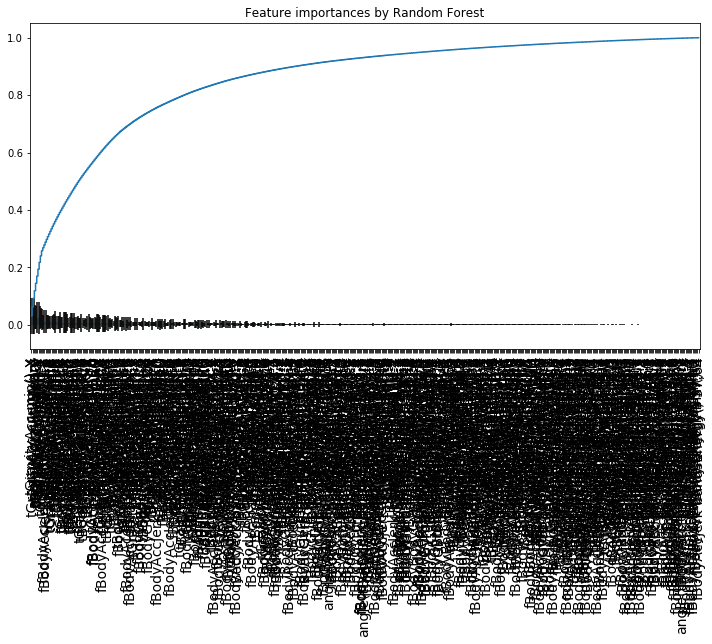

In [49]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
feat_names = train_data.drop('Activity', axis=1).columns.values

plt.figure(figsize=(12,6))
plt.title("Feature importances by Random Forest")
plt.bar(range(len(indices)), importances[indices], color='lightblue', yerr=std[indices], align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])

In [33]:
predicted = cross_val_predict(rfc, X_test, y_test, cv=10)
print (classification_report(y_test, predicted3))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.88      0.90      0.89       491
          STANDING       0.91      0.88      0.90       532
           WALKING       0.96      0.95      0.95       496
WALKING_DOWNSTAIRS       0.93      0.86      0.89       420
  WALKING_UPSTAIRS       0.90      0.97      0.93       471

       avg / total       0.93      0.93      0.93      2947



In [34]:
rfc2= RandomForestClassifier(n_estimators= 100)
predicted2 = cross_val_predict(rfc2, X_test, y_test, cv=10)
print (classification_report(y_test, predicted2))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.88      0.92      0.90       491
          STANDING       0.92      0.89      0.90       532
           WALKING       0.97      0.96      0.96       496
WALKING_DOWNSTAIRS       0.94      0.86      0.90       420
  WALKING_UPSTAIRS       0.90      0.97      0.94       471

       avg / total       0.94      0.94      0.94      2947



In [35]:
rfc3= RandomForestClassifier(n_estimators= 50)
predicted3 = cross_val_predict(rfc3, X_test, y_test, cv=10)
print (classification_report(y_test, predicted3))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.91      0.88       491
          STANDING       0.91      0.86      0.89       532
           WALKING       0.95      0.95      0.95       496
WALKING_DOWNSTAIRS       0.93      0.86      0.89       420
  WALKING_UPSTAIRS       0.89      0.96      0.93       471

       avg / total       0.92      0.92      0.92      2947



In [54]:
model2 = rfc2.fit(X_train,y_train)
pred = model2.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix
score = accuracy_score(y_test, pred)

In [56]:
print(score)

0.92093654564


In [57]:
from sklearn import preprocessing
labelEncoder= preprocessing.LabelEncoder()

labelEncoder.fit(y_test)

LabelEncoder()

In [58]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[537   0   0   0   0   0]
 [  0 435  56   0   0   0]
 [  0  40 492   0   0   0]
 [  0   0   0 481  10   5]
 [  0   0   0  25 348  47]
 [  0   0   0  43   7 421]]


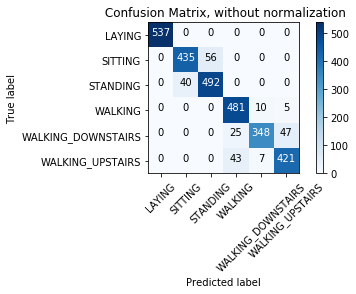

In [59]:
cfs = confusion_matrix(y_test, pred)
plt.figure()
class_names = labelEncoder.classes_
plot_confusion_matrix(cfs, classes=class_names, title=' Confusion Matrix, without normalization')

In [60]:
feature_impotants = np.sort(rfc2.feature_importances_)
feature_impotants_df=pd.DataFrame(feature_impotants)
feature_impotants_df.head()

,0
0,0.000065
1,0.000068
2,0.000079
3,0.000085
4,0.000088


In [61]:
feature_impotants_df.describe()

,0
count,561.000000
mean,0.001783
std,0.003898
min,0.000065
25%,0.000225
50%,0.000388
75%,0.001542
max,0.033335


In [63]:
features = pd.DataFrame({'features': train_data.columns[0:561], 'score': rfc2.feature_importances_})
train_features=features[features['score']>=0.001542]
train_features.head()

,features,score
3,tBodyAcc-std()-X,0.008227
6,tBodyAcc-mad()-X,0.006103
9,tBodyAcc-max()-X,0.002852
16,tBodyAcc-energy()-X,0.002763
37,"tBodyAcc-correlation()-X,Y",0.005097


In [65]:
train_features.shape

(140, 2)

In [66]:
clf_on_removed_features=RandomForestClassifier(n_estimators=100)
clf_on_removed_features.fit(train_data[train_features.features],train_data.Activity)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [67]:
predict_on_removed_features = clf_on_removed_features.predict(test_data[train_features.features])

In [68]:
print(classification_report(test_data.Activity,predict_on_removed_features))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.89      0.85      0.87       491
          STANDING       0.86      0.90      0.88       532
           WALKING       0.88      0.97      0.92       496
WALKING_DOWNSTAIRS       0.98      0.84      0.91       420
  WALKING_UPSTAIRS       0.87      0.89      0.88       471

       avg / total       0.91      0.91      0.91      2947

